In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('Mall_Customers.csv')
print("Data shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Data shape: (200, 5)

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
from IPython.display import display

display(df) 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster,HC_Cluster
0,1,Male,19,15,39,2,2
1,2,Male,21,15,81,2,5
2,3,Female,20,16,6,3,2
3,4,Female,23,16,77,2,5
4,5,Female,31,17,40,2,2
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,4
196,197,Female,45,126,28,4,1
197,198,Male,32,126,74,1,4
198,199,Male,32,137,18,4,1


In [3]:

features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = kmeans_labels

In [5]:

Z = linkage(X_scaled, method='ward')
hc_labels = fcluster(Z, t=5, criterion='maxclust')
df['HC_Cluster'] = hc_labels

In [6]:

kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
hc_silhouette = silhouette_score(X_scaled, hc_labels)

print("\nSilhouette Scores:")
print(f"KMeans: {kmeans_silhouette:.3f}")
print(f"Hierarchical: {hc_silhouette:.3f}")


Silhouette Scores:
KMeans: 0.408
Hierarchical: 0.390


Text(0.5, 1.0, 'KMeans Clustering (k=5)')

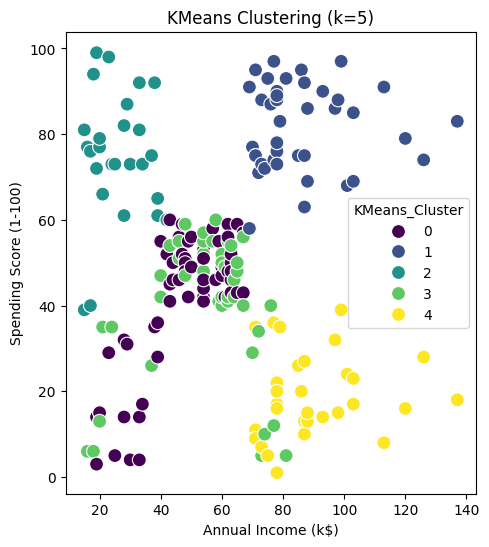

In [12]:

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='KMeans_Cluster', palette='viridis', s=100)
plt.title('KMeans Clustering (k=5)')


Text(0.5, 1.0, 'Hierarchical Clustering (k=5)')

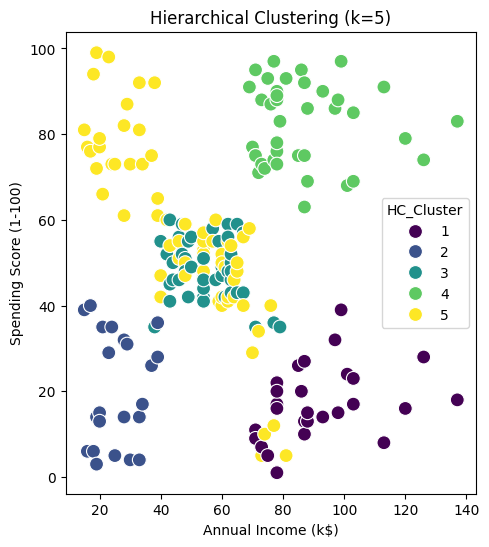

In [13]:

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='HC_Cluster', palette='viridis', s=100)
plt.title('Hierarchical Clustering (k=5)')


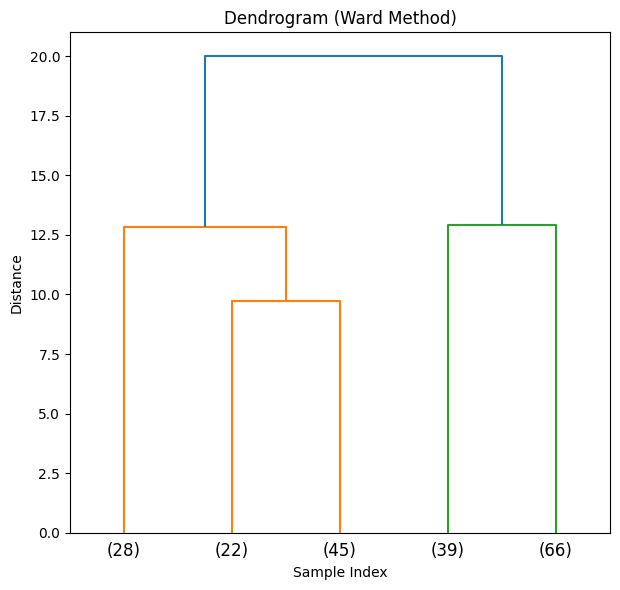

In [16]:

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 3)
dendrogram(Z, truncate_mode='lastp', p=5)
plt.title('Dendrogram (Ward Method)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

plt.tight_layout()
plt.savefig('clustering_results.png')
plt.show()


In [10]:

def describe_clusters(df, features, cluster_col):
    cluster_profiles = {}
    for cluster in sorted(df[cluster_col].unique()):
        profile = {
            'Count': len(df[df[cluster_col] == cluster]),
            'Percentage': len(df[df[cluster_col] == cluster])/len(df)*100
        }
        for feature in features:
            profile[feature] = {
                'Mean': df[df[cluster_col] == cluster][feature].mean(),
                'Median': df[df[cluster_col] == cluster][feature].median()
            }
        cluster_profiles[f'Cluster {cluster}'] = profile
    return pd.DataFrame(cluster_profiles).transpose()

print("\n=== KMeans Cluster Profiles ===")
print(describe_clusters(df, features, 'KMeans_Cluster'))

print("\n=== Hierarchical Cluster Profiles ===")
print(describe_clusters(df, features, 'HC_Cluster'))

print("\n=== Business Interpretation ===")
print("1. High Income, Low Spending (Potential Targets for Luxury Marketing)")
print("2. Moderate Income, High Spending (Best Customers)")
print("3. Young, High Spending (Trend Followers)")
print("4. Low Income, Low Spending (Budget Conscious)")
print("5. Average Across Metrics (Need Engagement Strategies)")


=== KMeans Cluster Profiles ===
          Count Percentage                                           Age  \
Cluster 0    58       29.0  {'Mean': 55.275862068965516, 'Median': 53.0}   
Cluster 1    40       20.0              {'Mean': 32.875, 'Median': 32.0}   
Cluster 2    26       13.0   {'Mean': 25.76923076923077, 'Median': 24.0}   
Cluster 3    45       22.5  {'Mean': 26.733333333333334, 'Median': 26.0}   
Cluster 4    31       15.5   {'Mean': 44.38709677419355, 'Median': 44.0}   

                                     Annual Income (k$)  \
Cluster 0   {'Mean': 47.62068965517241, 'Median': 48.5}   
Cluster 1                {'Mean': 86.1, 'Median': 78.5}   
Cluster 2  {'Mean': 26.115384615384617, 'Median': 24.5}   
Cluster 3   {'Mean': 54.31111111111111, 'Median': 59.0}   
Cluster 4    {'Mean': 89.7741935483871, 'Median': 87.0}   

                                 Spending Score (1-100)  
Cluster 0  {'Mean': 41.706896551724135, 'Median': 46.0}  
Cluster 1              {'Mean': 81.525,